**to run on Google Colab, chenge to GPU runtime (menu: Runtime -> Change runtime type)**

In [1]:
!wget --quiet https://github.com/yoctoyotta1024/CLEO/archive/refs/heads/main.zip

In [2]:
%%file script.sh
cd CLEO-main

mkdir -p bin
echo "#!/bin/bash" > bin/module
echo "#!/bin/bash" > bin/spack
chmod 755 bin/*
export PATH=./bin:$PATH
export CPLUS_INCLUDE_PATH=/usr/lib/x86_64-linux-gnu/openmpi/include/

echo -e "levante_gxx_compiler=g++\nlevante_gcc_compiler=gcc" > scripts/bash/src/levante_packages.sh

. scripts/build_compile_cleo.sh cuda gcc \
  . \
  output \
  "golcolls longcolls" \
  false \
  false \
  "" \
  false

Writing script.sh


In [3]:
!unzip main.zip

Archive:  main.zip
e8f3706c4280ef30834aef4c089a3415d5a6d9a1
   creating: CLEO-main/
   creating: CLEO-main/.github/
  inflating: CLEO-main/.github/compare_parallel_results.sh  
   creating: CLEO-main/.github/workflows/
  inflating: CLEO-main/.github/workflows/CI.yml  
  inflating: CLEO-main/.github/workflows/build.yml  
  inflating: CLEO-main/.github/workflows/cocogitto.yml  
  inflating: CLEO-main/.github/workflows/pre-commit.yml  
  inflating: CLEO-main/.gitignore    
  inflating: CLEO-main/.pre-commit-config.yaml  
  inflating: CLEO-main/CHANGELOG.md  
  inflating: CLEO-main/CITATION.cff  
  inflating: CLEO-main/CMakeLists.txt  
  inflating: CLEO-main/LICENSE.md    
  inflating: CLEO-main/README.md     
  inflating: CLEO-main/ci_environment.yaml  
  inflating: CLEO-main/cog.toml      
   creating: CLEO-main/docs/
  inflating: CLEO-main/docs/Makefile  
   creating: CLEO-main/docs/doxygen/
  inflating: CLEO-main/docs/doxygen/doxygen.dox  
   creating: CLEO-main/docs/source/
  inflatin

In [4]:
!. script.sh

### --------------- User Inputs -------------- ###
CLEO_BUILDTYPE = cuda
CLEO_COMPILERNAME = gcc
CLEO_PATH2CLEO = .
CLEO_PATH2BUILD = output
CLEO_ENABLEDEBUG = false
CLEO_ENABLEYAC = false
CLEO_YACYAXTROOT = 
executables = golcolls longcolls
### ------------------------------------------- ###
./scripts/bash/build_cleo.sh
### --------------- Build Inputs -------------- ###
CLEO_BUILDTYPE: cuda
CLEO_COMPILERNAME: gcc
CLEO_PATH2CLEO: .
CLEO_PATH2BUILD: output
CLEO_CXX_COMPILER: g++
CLEO_CC_COMPILER: gcc
CLEO_CXX_FLAGS:  -Werror -Wall -Wextra -pedantic -Wno-unused-parameter -O3 -mfma
CLEO_KOKKOS_BASIC_FLAGS:  -DKokkos_ARCH_NATIVE=ON -DKokkos_ENABLE_SERIAL=ON
CLEO_KOKKOS_HOST_FLAGS:  -DKokkos_ENABLE_OPENMP=ON
CLEO_KOKKOS_DEVICE_FLAGS:  -DKokkos_ENABLE_CUDA=ON   -DKokkos_ENABLE_CUDA_CONSTEXPR=ON -DKokkos_ENABLE_CUDA_RELOCATABLE_DEVICE_CODE=ON   -DCUDA_ROOT= -DNVCC_WRAPPER_DEFAULT_COMPILER=g++
CLEO_ENABLEYAC: false
CLEO_YACYAXTROOT: 
CLEO_YAC_FLAGS: -DENABLE_YAC_COUPLING=OFF
CLEO_MODULE_PATH:

In [26]:
!pip install --quiet awkward ruamel.yaml zarr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.0/187.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.8 MB/s eta 0:00:00


In [37]:
!cd CLEO-main; \
  echo "import numpy as np; derive_more_floats = lambda x: {'RHO0':1, 'MASS0':1, 'COORD0':1000, 'RHO_L':1000, 'RHO_SOL':np.nan, 'MR_SOL': np.nan, 'IONIC':np.nan}" >> pySD/cxx2py.py; \
  python3 \
  examples/boxmodelcollisions/shima2009.py \
  /content/CLEO-main \
  /content/CLEO-main/output \
  /content/CLEO-main/examples/boxmodelcollisions/shima2009_config.yaml \
  golovin

created boundaries for 1 gridboxes
Writing gridbox boundaries binary file to:
 /content/CLEO-main/output/share/shima2009_dimlessGBxboundaries.dat
Reading binary file:
 /content/CLEO-main/output/share/shima2009_dimlessGBxboundaries.dat
Metadata: 
 '4 unsigned ints before this metadata string are [1. position of first byte of data (after all the metadata), 2. no. bytes of (this) global metadata string, 3. no. bytes per variable specific metadata, 4. no. of variables in data]. After this global metadata string comes variable specific metadata. For each variable, this is 3 unsigned ints, 2 chars and then a double; it states: [1. position of first databyte, 2. size (in bytes) of one datapoint, 3. no. of datapoints, 4. char to indicate python struct type, 5. char to indicate the units once multiplied by, 6. the scale factor]. Variables in this file are ndims in (z,x,y), then the 1 gridbox indicies followed by the [zmin, zmax, xmin, xmax, ymin, ymax] coordinates for each gridbox's boundaries.

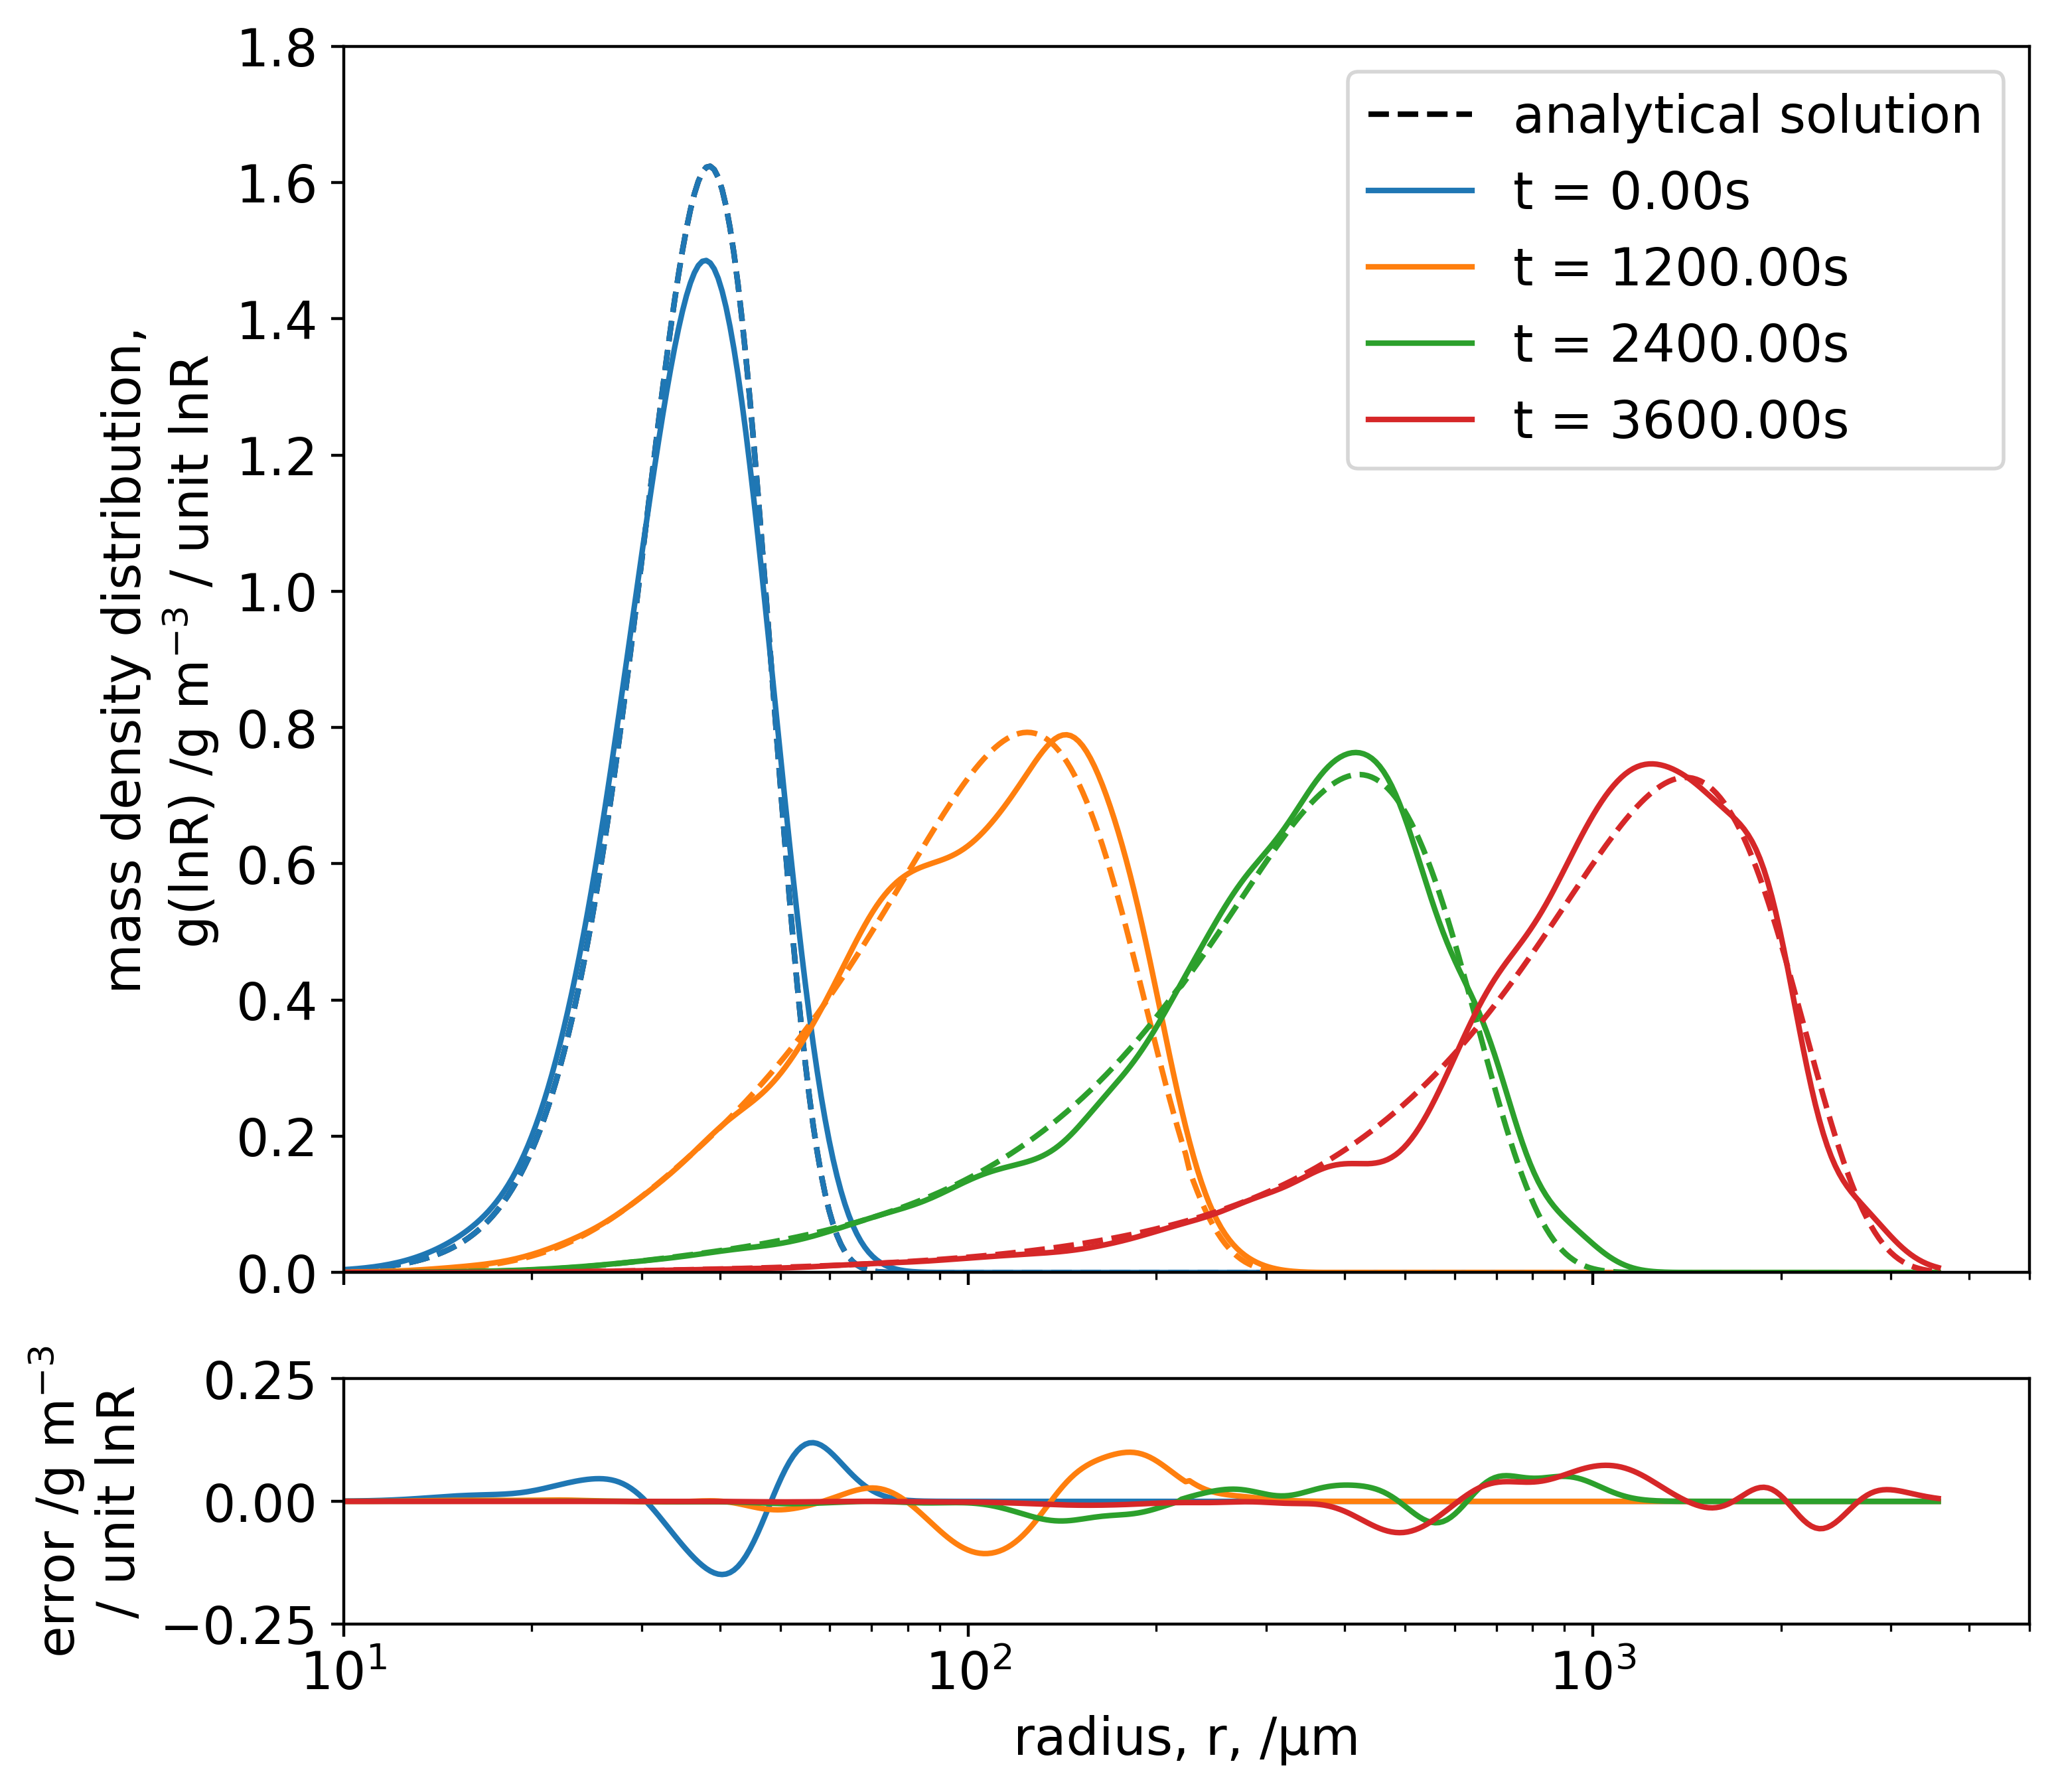

In [38]:
from IPython.display import Image
display(Image('CLEO-main/output/bin/golovin_validation.png'))